In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.io import fits
from astropy.table import Table
from gammapy.irf import EffectiveAreaTable
from gammapy.irf import EnergyDispersion2D

In [5]:
scaled_file = '../gpropa_paper/irf/irf_south_bracketed/CTA-Performance-South-20deg-S-05h_20170627.fits.gz'
classical_file = '../gpropa_paper/irf/irf_south/CTA-Performance-South-20deg-N-05h_20170627.fits.gz'

# New IRF
scaled = fits.open(scaled_file)
aeff_new = EffectiveAreaTable.from_hdulist(scaled)
edisp_new = EnergyDispersion2D.read(scaled_file, hdu='ENERGY DISPERSION')
rmf_new = edisp_new.to_energy_dispersion(offset=0.5 * u.deg)

# Original IRF
orig = fits.open(classical_file)
aeff = EffectiveAreaTable.from_hdulist(orig)
edisp = EnergyDispersion2D.read(classical_file, hdu='ENERGY DISPERSION')
rmf = edisp.to_energy_dispersion(offset=0.5 * u.deg)

In [12]:
ratio = aeff_new.data.data / aeff.data.data
ratio

<Quantity [8.2615411e-01, 1.5339199e-01, 4.6081077e-02, 2.0738231e-02,
           1.2617877e-02, 8.8035343e-03, 6.6490895e-03, 4.4512092e-03,
           2.8637373e-03, 2.1104484e-03, 1.6459818e-03, 1.2929649e-03,
           1.0303075e-03, 8.0440554e-04, 6.5248995e-04, 5.0900533e-04,
           4.1530727e-04, 3.4951861e-04, 2.9005139e-04, 2.3877037e-04,
           1.9240743e-04, 1.5317606e-04, 1.2192132e-04, 9.9920748e-05,
           8.6940650e-05, 7.6434320e-05, 6.9382302e-05, 6.4483960e-05,
           5.9912658e-05, 5.5475106e-05, 5.2924162e-05, 5.1086990e-05,
           4.8997383e-05, 4.7412603e-05, 4.5104734e-05, 4.3707772e-05,
           4.5932429e-05, 4.3613054e-05, 4.2325395e-05, 4.3459135e-05,
           4.3325574e-05, 4.1751100e-05]>

<Quantity [ 1.10005661,  1.20479906,  1.20479906,  1.20479906,  1.20479906,
            1.29035394,  1.29035394,  1.29035394,  1.29035394,  0.61591418,
            0.61591418,  0.61591418,  0.95811392,  0.95811392,  0.95811392,
            0.95811392,  0.95116249,  0.95116249,  0.95116249,  0.95116249,
            1.15098447,  1.15098447,  1.15098447,  1.15098447,  0.66410127,
            0.66410127,  0.66410127,  0.66410127,  0.80049023,  0.80049023,
            0.80049023,  0.80049023,  0.88584071,  0.88584071,  0.88584071,
            0.88584071,  0.96572729,  0.96572729,  0.96572729,  0.96572729,
            1.30874607,  1.30874607,  1.30874607,  1.30874607,  0.39156003,
            0.39156003,  0.39156003,  0.39156003,  1.56332798,  1.56332798,
            1.56332798,  1.56332798,  0.75263604,  0.75263604,  0.75263604,
            0.75263604, -7.90956822, -7.90956822, -7.90956822, -7.90956822,
            3.79839176,  3.79839176,  3.79839176,  3.79839176,  1.87089874,
            

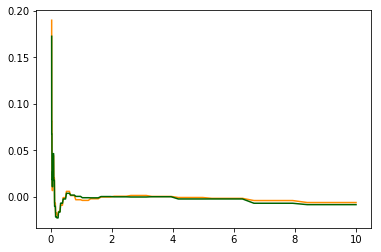

In [7]:
energy = np.logspace(-1.5,1, 100) * u.TeV
bias_new = rmf_new.get_bias(energy)
bias = rmf.get_bias(energy)
plt.plot(energy.value, bias_new, c='darkorange')
plt.plot(energy.value, bias, c='darkgreen')
bias_new/bias

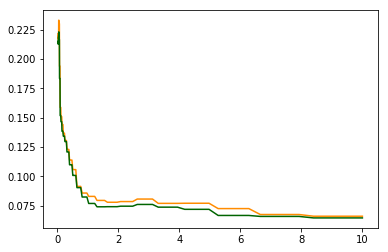

In [8]:
energy = np.logspace(-1.5,1, 100) * u.TeV
resol_new = rmf_new.get_resolution(energy)
resol = rmf.get_resolution(energy)
plt.plot(energy.value, resol_new, c='darkorange')
plt.plot(energy.value, resol, c='darkgreen')

In [9]:
resol_new/resol

<Quantity [1.02999495, 1.018887  , 1.018887  , 1.018887  , 1.018887  ,
           1.0044627 , 1.0044627 , 1.0044627 , 1.0044627 , 1.04455605,
           1.04455605, 1.04455605, 1.06242302, 1.06242302, 1.06242302,
           1.06242302, 1.05689443, 1.05689443, 1.05689443, 1.05689443,
           1.04641839, 1.04641839, 1.04641839, 1.04641839, 1.02954982,
           1.02954982, 1.02954982, 1.02954982, 1.04163623, 1.04163623,
           1.04163623, 1.04163623, 1.01898565, 1.01898565, 1.01898565,
           1.01898565, 1.00713149, 1.00713149, 1.00713149, 1.00713149,
           1.01795464, 1.01795464, 1.01795464, 1.01795464, 1.03661825,
           1.03661825, 1.03661825, 1.03661825, 1.04924637, 1.04924637,
           1.04924637, 1.04924637, 1.01167691, 1.01167691, 1.01167691,
           1.01167691, 1.04105219, 1.04105219, 1.04105219, 1.04105219,
           1.07847251, 1.07847251, 1.07847251, 1.07847251, 1.07341139,
           1.07341139, 1.07341139, 1.07341139, 1.05103482, 1.05103482,
      

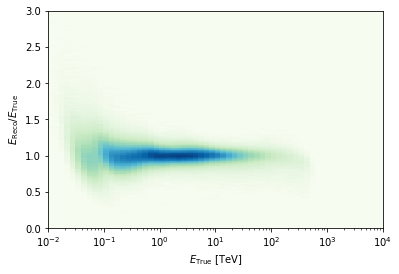

In [10]:
edisp_new.plot_bias()

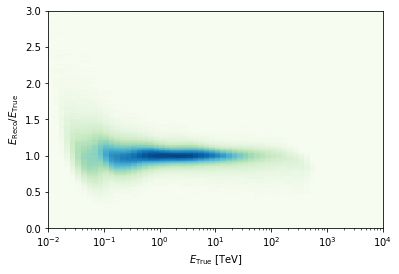

In [11]:
edisp.plot_bias()

In [100]:
scaled[3].name

'ENERGY DISPERSION'

In [99]:
orig[3].name

'ENERGY DISPERSION'